# **Emerging Skills Survey**


Stack Overflow, a popular website for developers, conducted an online survey of software professionals across the world. The survey data was later open sourced by Stack Overflow. The actual data set has around 90,000 responses. However, the dataset used in this project is only a subset of the original (containing only around 1/10th of the original dataset). Any conclusions drawn from the analysis of this subset may not reflect the real world scenario.

<img src="https://github.com/za-mntungwa/emergingTechSkills/blob/5fb0b3118c6811c096513e626457e32df2fe2492/stackOverflow.png?raw=true"/>



## Load the dataset


Import the required libraries.

PS: If you haven't already, you will have to install the pandas and matplotlib libraries to run some of the code in this notebook. Un-comment and run the cell below for the installation.


In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# import piplite
# await piplite.install('seaborn')
import seaborn as sns
import sqlite3

*FOR DATA VISUALISATION*

PS: Uncomment and run the cell below only in the event that you don't have `wget` already installed.

In [ ]:
# await !pip install wget
# import wget

The dataset is available on the IBM Cloud at the below url.


In [6]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

Load the data available at dataset_url into a dataframe.


In [7]:
df = pd.read_csv(dataset_url)

## Exploring the dataset


### Displaying the top 5 rows and columns from the dataset.

It is a good idea to print the top 5 rows of the dataset to get a feel of how the dataset looks.


In [8]:
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


### Finding out the number of rows and columns

We then continue by exploring the number of rows and columns of data in the dataset.



In [9]:
# number of rows
df.shape[0]

11552

In [10]:
# number of columns
df.shape[1]

85

### Identify the data types of each column

We explore the dataset futher, and identify the data types of each column.


In [11]:
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

### Identify the countries of the survey respondents

The dataset is the result of a world-wide survey, thus as we continue to explore we identify how many unique countries there are in the Country column. We further analyse the average age of the respondents.


In [12]:
# number of unique countries
print(len(pd.unique(df['Country'])))

135


In [13]:
# average age of participants
df.loc[:, "Age"].mean()

30.77239449133718

## Data Wrangling


### Handling duplicates

Here, we will identify and remove duplicate values in the dataset.


In [14]:
# find duplicate rows in the dataset
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

154

In [15]:
# remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [16]:
# verify if duplicates were removed
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

0

### Finding missing values

In this cell, we identify missing values for all columns.


In [17]:
# identify missing values for all columns
df.columns[df.isnull().any()]

Index(['OpenSource', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc',
       'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow',
       'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTim

In [18]:
# identify missing rows in the 'WorkLoc' column
df['WorkLoc'].isnull().sum()

32

In [19]:
# find the number of each category in 'WorkLoc' column
df['WorkLoc'].value_counts()

WorkLoc
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: count, dtype: int64

In [20]:
#find the most frequent value in 'WorkLoc' column
df['WorkLoc'].mode()

0    Office
Name: WorkLoc, dtype: object

In [21]:
# impute the missing values in the 'WorkLoc' column with the most frequent value
df['WorkLoc'].fillna('Office', inplace=True)

In [22]:
# verify if imputing was successful
df['WorkLoc'].isnull().sum()

0

### Normalizing the data

There are two columns in the dataset that address compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this cell we will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


In [23]:
# list the various categories in 'CompFreq' column
df.CompFreq.value_counts().index

Index(['Yearly', 'Monthly', 'Weekly'], dtype='object', name='CompFreq')

We use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is:
- Yearly then use the exising value in CompTotal
- Monthly then multiply the value in CompTotal with 12 (months in an year)
- Weekly then multiply the value in CompTotal with 52 (weeks in an year)

In [24]:
# normalize the 'CompTotal' column to annual basis
norm_annual_comp = []

for i in range(len(df)):
    
    if df['CompFreq'].iloc[i] == 'Weekly':
        norm_annual_comp.append(df['CompTotal'].iloc[i]*52)
    elif df['CompFreq'].iloc[i] == 'Monthly':
        norm_annual_comp.append(df['CompTotal'].iloc[i]*12)
    else:
        norm_annual_comp.append(df['CompTotal'].iloc[i]*1)

df['NormalizedAnnualCompensation']= norm_annual_comp
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0


## Exploratory Data Analysis


### Distribution

In this section, we look at the distribution of the data.

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


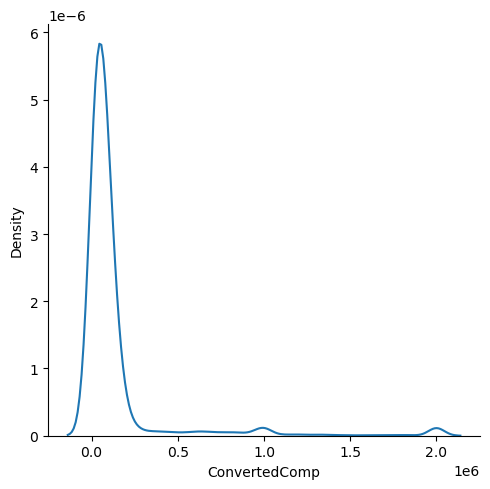

In [27]:
# plot the distribution curve for the column `ConvertedComp`
sns.displot(data=df, x="ConvertedComp", kind="kde")
plt.show() 

<Axes: ylabel='Frequency'>

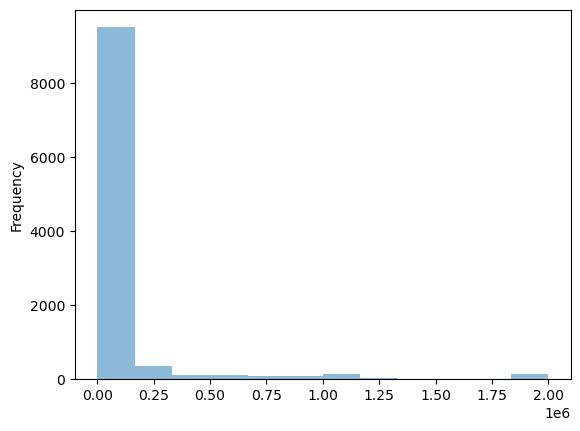

In [26]:
# plot the histogram for the column 'ConvertedComp'
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)

In [28]:
# find the median of the column 'ConvertedComp'
df['ConvertedComp'].median()

57745.0

In [29]:
# how many records are there for each category of the 'Gender' column
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [30]:
# find the median of the column 'ConvertedComp' for people identified as 'Woman' only
df[df['Gender'].eq('Woman')]['ConvertedComp'].median()

57708.0

In [31]:
# find the five number summary of the column 'Age'
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

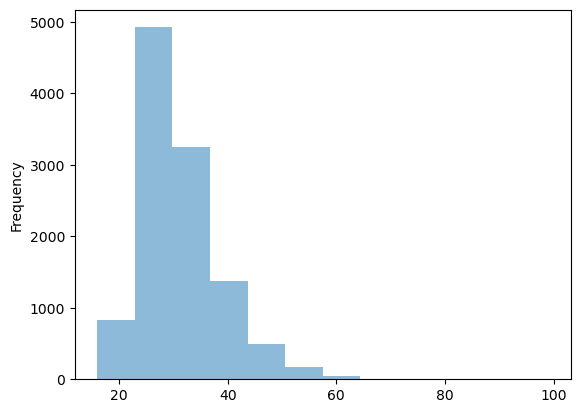

In [32]:
# plot a histogram of the column 'Age'
df['Age'].plot.hist(bins=12, alpha=0.5)

### Outliers

In this section, we evaluate if there are outliers in the data.


<Axes: xlabel='ConvertedComp'>

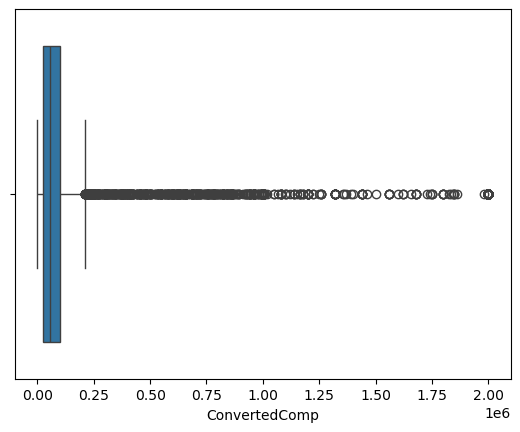

In [33]:
# box plot the column 'ConvertedComp'
sns.boxplot(x=df['ConvertedComp'])

In [34]:
# find the interquartile range for the column 'ConvertedComp'
df['ConvertedComp'].describe()

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile range is', IQR)

Interquartile range is 73132.0


In [35]:
# find the upper and lower bounds for the column 'ConvertedComp'
Q4 = Q3 + IQR*1.5
Q0 = Q1 - IQR*1.5
print('Upper bound:', Q4)
print('Lower bound:', Q0)

Upper bound: 209698.0
Lower bound: -82830.0


In [36]:
# identify how many outliers there are in the column 'ConvertedComp'
outliers = 0

for conv_comp in df['ConvertedComp']:
    if (conv_comp < Q0) or (conv_comp > Q4):
        outliers = outliers + 1

outliers

879

In [37]:
# remove the outliers from the dataframe
outl_index = df[(df.ConvertedComp < Q0) | (df.ConvertedComp > Q4)].index

df_outl = df.drop(outl_index)
df_outl.shape

(10519, 86)

### Correlation

In [39]:
# find the correlation between 'Age' and all other numerical columns
df.corr(numeric_only=True)['Age']

Respondent                      0.004041
CompTotal                       0.006970
ConvertedComp                   0.105386
WorkWeekHrs                     0.036518
CodeRevHrs                     -0.020469
Age                             1.000000
NormalizedAnnualCompensation   -0.005238
Name: Age, dtype: float64

## Data Visualisation

Download database file for the data visualisation.

PS: If you don't already have  `wget` installed:  
    - Go back to cell marked *FOR DATA VISUALISATION* above  
    - Then, uncomment and run the cell below before continuing

In [ ]:
# db_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
# m4_survey_data.sqlite = wget.download(db_url)   # downloads file into current working directory

Skip the following cell if you uncommented and ran the above one.

In [41]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2025-09-15 14:20:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34,98M  1,80MB/s    in 20s     

2025-09-15 14:20:35 (1,72 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



In [42]:
# connect to the database
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

### Visualising Relationships

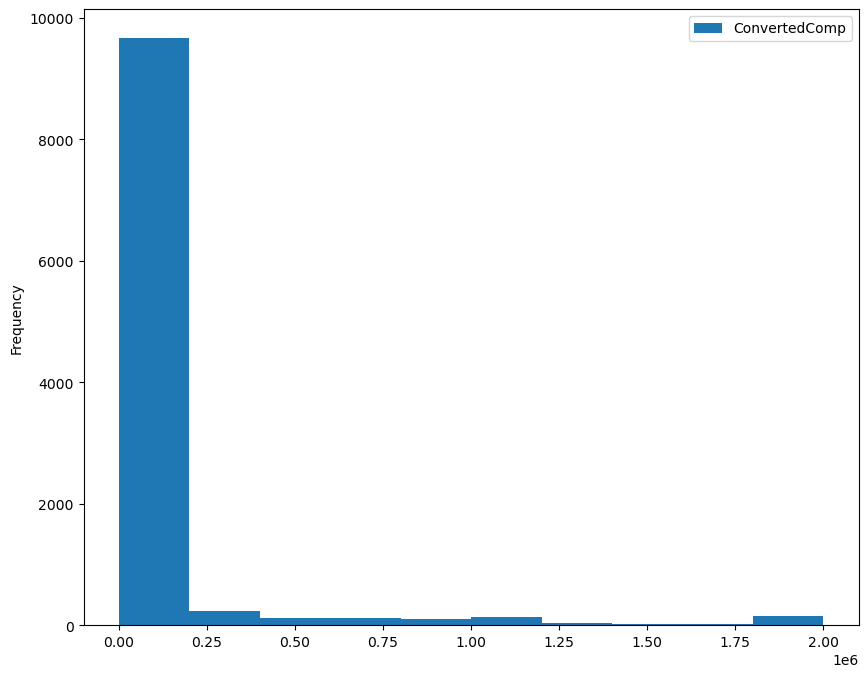

In [ ]:
# histogram of 'ConvertedComp'
QUERY1 = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY1,conn)
df.head()
df.plot(kind='hist', figsize=(10, 8) )

plt.show()

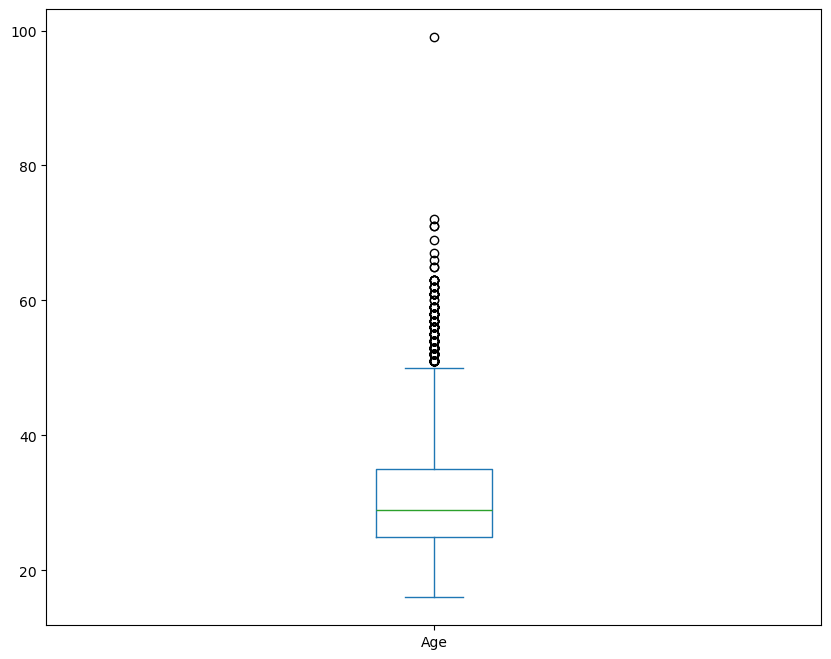

In [ ]:
# box plot of 'Age'
QUERY2 = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY2,conn)
df.head()
df.plot(kind='box', figsize=(10, 8) )

plt.show()

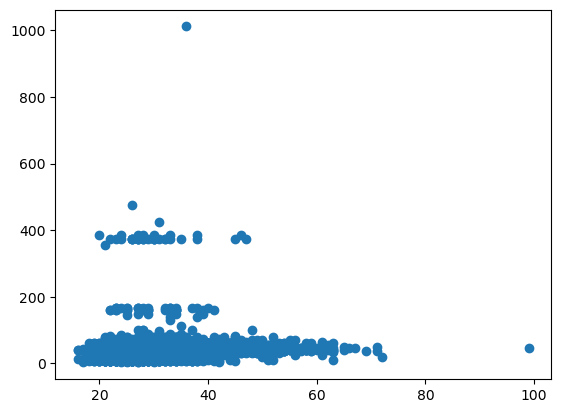

In [46]:
# scatterplot of 'Age' and 'WorkWeekHrs' columns
Age = pd.read_sql_query(QUERY2, conn)
WWH = pd.read_sql_query('SELECT WorkWeekHrs FROM master', conn)

Query3 = """
SELECT Age, WorkWeekHrs
FROM master
"""
Age_WWH = pd.read_sql_query(Query3, conn)
plt.scatter(x = Age, y = WWH)

plt.show()

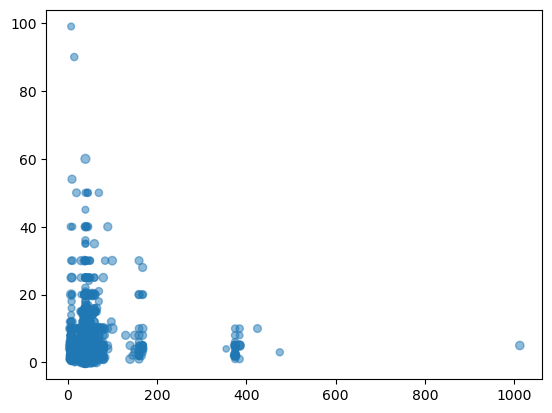

In [47]:
# bubble plot of 'WorkWeekHrs' and 'CodeRevHrs' columns with 'Age' as bubble size
CRH = pd.read_sql_query('SELECT CodeRevHrs FROM master', conn)

Query4 = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
"""
Age_WWH = pd.read_sql_query(Query4, conn)
plt.scatter(x = WWH, y = CRH, s = Age, alpha=0.5)

plt.show()

### Visualising Composition

#### Pie Charts

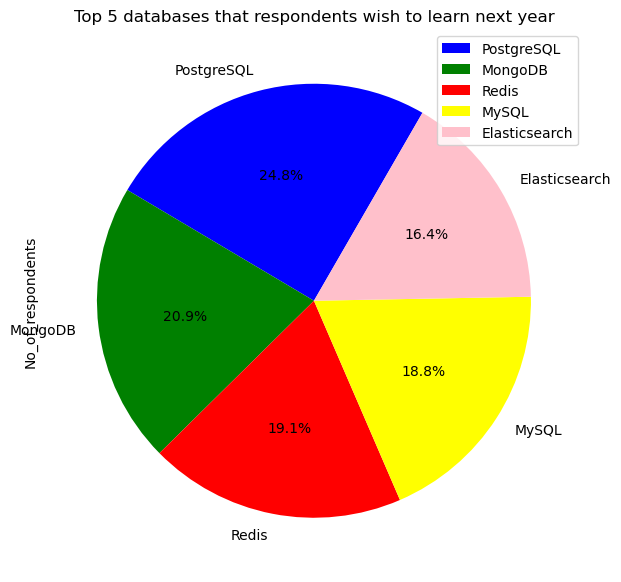

In [48]:
# top 5 databases that respondents wish to learn the following year
Query5 = """
SELECT DatabaseDesireNextYear as Database, count(*) as No_of_respondents
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear 
ORDER BY No_of_respondents DESC LIMIT 5"""

db_df = pd.read_sql_query(Query5, conn)

db_df.plot(kind = 'pie', labels = db_df['Database'], y = 'No_of_respondents',
figsize = (7,10), #dimension of the chart window
autopct='%1.1f%%', #autopct displays percentages in pie chart. so .1f% rounds to 1 decimal place.
colors = ['blue', 'green', 'red', 'yellow', 'pink'], #colours of the pie chart items
startangle = 60) #start Angle implies that we can rotate the pie chart according to the degree angle we specify  
plt.title('Top 5 databases that respondents wish to learn next year')

plt.show()

#### Stacked Charts

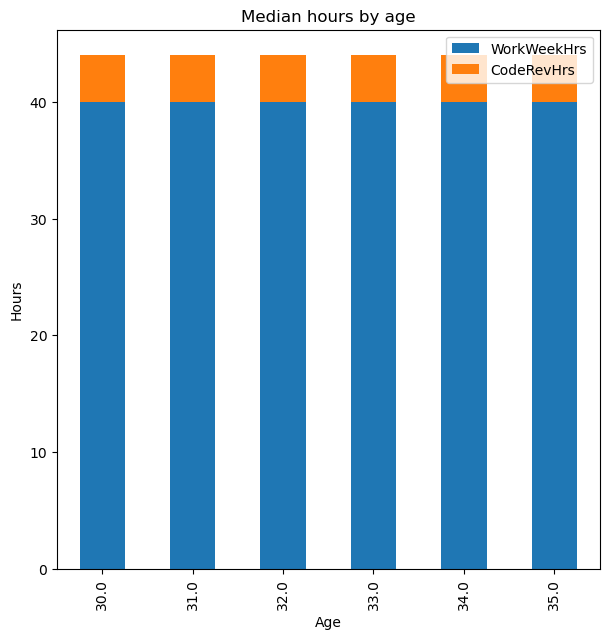

In [49]:
# chart of median 'WorkWeekHrs' and 'CodeRevHrs' columns for the age group 30 to 35
Query6 = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""
stacked_df = pd.read_sql_query(Query6, conn)

stacked_df = stacked_df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

stacked_df.plot(kind = 'bar', stacked=True, figsize = (7,7))
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('Median hours by age')

plt.show()

## Visualising Comparison

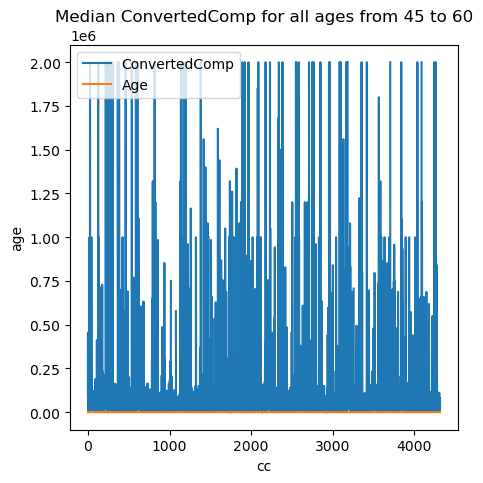

In [50]:
# median 'ConvertedComp' for all ages from 45 to 60
Query7 = """SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30
"""
line_df = pd.read_sql_query(Query7, conn)

line_df.plot(kind = 'line', figsize = (5,5))
plt.xlabel('cc')
plt.ylabel('age')
plt.title('Median ConvertedComp for all ages from 45 to 60')

plt.show()